In [49]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
import seaborn as sns
digits = load_digits()

In [24]:
# Print to show there are 1797 images (8 by 8 images for a dimensionality of 64)
print("Image Data Shape" , digits.data.shape)

# Print to show there are 1797 labels (integers from 0-9)
print("Label Data Shape", digits.target.shape)

Image Data Shape (1797, 64)
Label Data Shape (1797,)


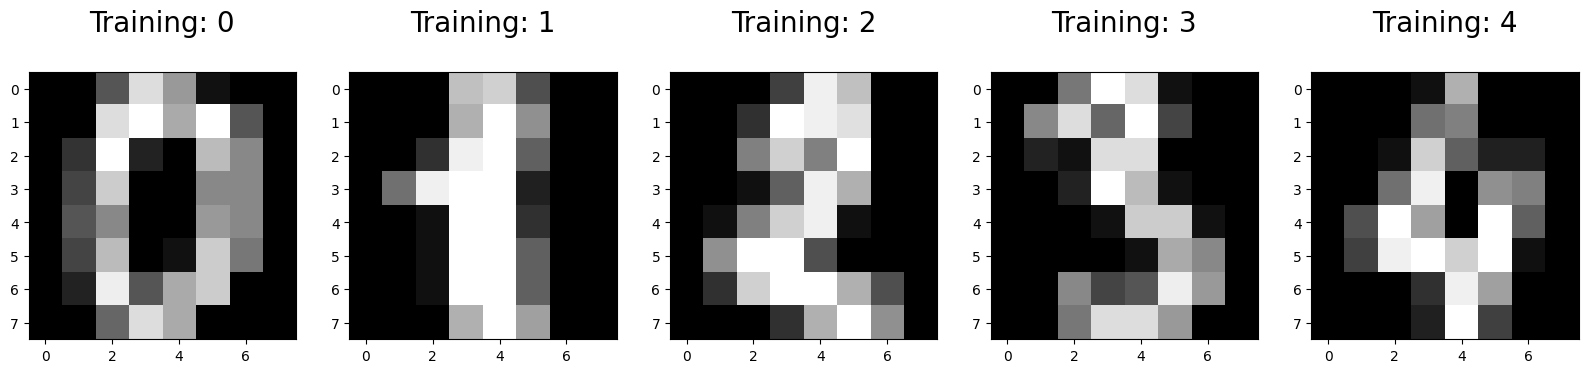

In [25]:
plt.figure(figsize=(20,4))
for index, (image, label) in enumerate(zip(digits.data[0:5], digits.target[0:5])):
    plt.subplot(1, 5, index + 1)
    plt.imshow(np.reshape(image, (8,8)), cmap=plt.cm.gray)
    plt.title('Training: %i\n' % label, fontsize = 20)

Split the training data into a training and test set

In [27]:
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.2, random_state=42)

The training set is used to train and make the model learn hidden features or patterns in the data. The data should have a diversified set of inputs so that the model is trained in all scenarios and can make predictions on a data sample that may appear in the future.

The test set is a separate set of data used to test the model after completing the training. It answers the question of how well the data performs.

Use the RandomForestClassifier built into sklearn to create a classification model.

In [29]:
# Create a random forest classifier 
rfc = RandomForestClassifier(random_state=42)

In [30]:
# Train the random forest classifier on the training set 
rfc.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [31]:
# Evaluate the random forest classifier on the test set
test_accuracy = rfc.score(X_test, y_test)
print(f"Test set accuracy: {test_accuracy:.3f}")

Test set accuracy: 0.972


Pick one parameter to tune, and explain why you chose this parameter.

The one parameter that I would tune is the n_estimator parameter. The greater the number of trees in the forest generally improves the quality of the model. This comes with a downside of having a longer model training time. This can be hazardous to your computer. A forest with too little trees will result in an underfitting of the data in the model.

Choose which value for the parameter to set for testing on the test data and explain why.

The parameter I would choose for testing on the test data would be max_depth. The reason for this is that the max_depth parameter controls the maximum depth of each decision tree in the random forest.

Print the confusion matrix for your Random Forest model on the test set.

In [33]:
# Use the Random Forest model to make predictions on the test set
y_pred = rfc.predict(X_test)

In [36]:
# Print the confusion matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[32  0  0  0  1  0  0  0  0  0]
 [ 0 28  0  0  0  0  0  0  0  0]
 [ 0  0 33  0  0  0  0  0  0  0]
 [ 0  0  0 32  0  1  0  0  1  0]
 [ 0  0  0  0 46  0  0  0  0  0]
 [ 0  0  0  0  0 45  1  0  0  1]
 [ 0  0  0  0  0  1 34  0  0  0]
 [ 0  0  0  0  0  0  0 33  0  1]
 [ 0  1  0  0  0  0  0  0 29  0]
 [ 0  0  0  0  0  1  0  1  0 38]]


Report which classes the model struggles with the most.

In [45]:
y_pred = rfc.predict(X_test)
conf_mat = confusion_matrix(y_test, y_pred)
print(conf_mat)

[[32  0  0  0  1  0  0  0  0  0]
 [ 0 28  0  0  0  0  0  0  0  0]
 [ 0  0 33  0  0  0  0  0  0  0]
 [ 0  0  0 32  0  1  0  0  1  0]
 [ 0  0  0  0 46  0  0  0  0  0]
 [ 0  0  0  0  0 45  1  0  0  1]
 [ 0  0  0  0  0  1 34  0  0  0]
 [ 0  0  0  0  0  0  0 33  0  1]
 [ 0  1  0  0  0  0  0  0 29  0]
 [ 0  0  0  0  0  1  0  1  0 38]]


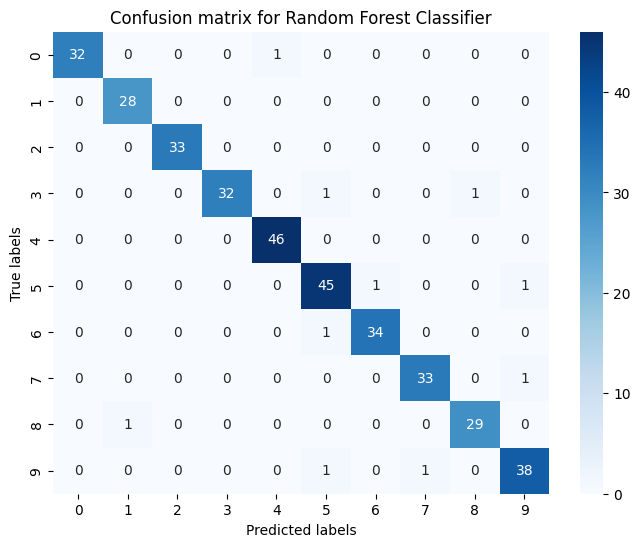

In [46]:
# Plot the confusion matrix using seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, cmap='Blues', fmt='g')
plt.title('Confusion matrix for Random Forest Classifier')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()

Report the accuracy, precision, recall, and f1-score

In [50]:
# Compute the accuracy, precision, recall, and f1-score
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

# Print the results
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-score: {f1:.2f}")

Accuracy: 0.97
Precision: 0.97
Recall: 0.97
F1-score: 0.97
